# Convolution Tests

In [1]:
import numpy as np
from scipy.ndimage import convolve as convolve_img
from scipy.signal import convolve as convolve_sig
from scipy.signal import convolve2d as convolve2d_sig

import convolution

In [2]:
x = np.array([[1, 0, 0, 1, 1]])

In [3]:
print("Custom")
print(convolution.convolve2d(x, x.transpose()))
print("Signal")
print(convolve2d_sig(x, x.transpose()))

Custom
[[1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1.]]
Signal
[[1 0 0 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 1 1]
 [1 0 0 1 1]]


In [4]:
X = np.array(
    [[1 , 2 , 3, 4, 5],
     [8 , 9 , 10, 4, 5],
     [15, 16, 17, 4, 5]], dtype=int) 
K = np.array(
    [[0, -1, 0, 3],
     [-1, 4, -1, 3],
     [0 ,-1, 0, 3]], dtype=int)

In [5]:
convolution.convolve2d(X, K) - convolution.convolve2d(K, X)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [6]:
%%timeit
convolution.convolve2d(K, X)

42.5 µs ± 337 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
%%timeit
convolution.convolve2d(X, K)

42.5 µs ± 233 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
%%timeit
convolve2d_sig(K, X)

2.06 µs ± 14.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
%%timeit
convolve2d_sig(X, K)

1.71 µs ± 15.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [10]:
convolution.convolve2d(X, K, crop=(2, 3),image_mode= False, edge_mode="constant", edge_params=[0])

array([[ -5.,  23.,  37.,  50.],
       [  0.,  79.,  74.,  96.],
       [ 23., 107.,  65.,  92.]])

---

## with Image

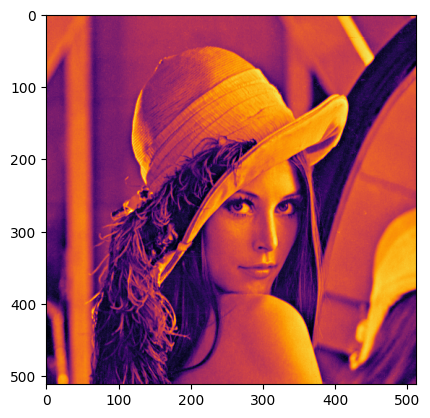

In [11]:
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage

im = pilimg.open("Lenna.png").convert('L')
pix = np.array(im)
plt.imshow(pix, cmap="inferno")


### Compare with Scipy routine

`convolve_img`: `scipy.ndimage.convolve`

`convolve(input, weight, ...)`

Note: this routine is implemneted for image processing, such that dimension of input and ouput always same.

$$n\times m , l \times k, (c_r, c_c)$$

if $l, k$ are odd

$$c_r = \frac{l+1}{2}, c_c = \frac{k+1}{2}$$

-> ??: What if $l, k$ are even?

mode:

1. reflect
2. constant
3. nearest
4. mirror
5. wrap

In [12]:
import numpy as np
from scipy.ndimage import convolve as convolve_img
from scipy.signal import convolve as convolve_sig
from scipy.signal import convolve2d as convolve2d_sig

import convolution

In [13]:
X = np.array(
    [[1 , 2 , 3, 4, 5],
     [8 , 9 , 10, 4, 5],
     [15, 16, 17, 4, 5]], dtype=int) 
X2 = np.array(
    [[1 , 2 , 3, 4,  5, 8],
     [8 , 9 , 10, 4, 5, 8],
     [15, 16, 17, 4, 5, 8]], dtype=int) 
test_filter = np.array([
    [2, 3],
    [4, 5],
])

In [14]:
convolution.convolve2d(X2, test_filter, image_mode=True)

array([[ 55.,  69.,  69.,  62.,  88.,  64.],
       [153., 167., 125.,  62.,  88.,  64.],
       [139., 148., 101.,  40.,  57.,  40.]])

In [15]:
convolve_img(X2, test_filter, mode="constant", cval=0)

array([[ 55,  69,  69,  62,  88,  64],
       [153, 167, 125,  62,  88,  64],
       [139, 148, 101,  40,  57,  40]])

1. reflect
2. constant
3. nearest
4. mirror
5. wrap

In [17]:
convolve_img(X, test_filter, mode="reflect")

array([[ 55,  69,  69,  62,  70],
       [153, 167, 125,  62,  70],
       [216, 230, 160,  62,  70]])

In [18]:
convolve_img(X, test_filter, mode="nearest")

array([[ 55,  69,  69,  62,  70],
       [153, 167, 125,  62,  70],
       [216, 230, 160,  62,  70]])

In [19]:
convolve_img(X, test_filter, mode="mirror")

array([[ 55,  69,  69,  62,  64],
       [153, 167, 125,  62,  64],
       [181, 195, 139,  62,  64]])

In [20]:
convolve_img(X, test_filter, mode="wrap")

array([[ 55,  69,  69,  62,  60],
       [153, 167, 125,  62, 102],
       [146, 160, 118,  62, 102]])

In [21]:
convolution.convolve2d(X2, test_filter)

array([[  2.,   7.,  12.,  17.,  22.,  31.,  24.],
       [ 20.,  55.,  69.,  69.,  62.,  88.,  64.],
       [ 62., 153., 167., 125.,  62.,  88.,  64.],
       [ 60., 139., 148., 101.,  40.,  57.,  40.]])

In [22]:
convolve_img(X2, test_filter,  mode="constant", cval=0)

array([[ 55,  69,  69,  62,  88,  64],
       [153, 167, 125,  62,  88,  64],
       [139, 148, 101,  40,  57,  40]])

In [23]:
filter ={
    "edge1": np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]),
    "edge2": np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]]),
    "sharpen": np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]]),
    "blur": np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]])/9,
    "identity": np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]])
}

In [24]:
def norm_image(p):
    p -= p.min()
    p *= (255/p.max())
    return np.asarray(p, dtype=np.uint8)

In [25]:
fil = filter["edge2"]
image_pix = pix
crop = (2, 2)
p_tem1_x = convolution.convolve2d(
     image_pix, fil  , crop, edge_mode="constant", edge_params=[0])
p_tem1_y = convolution.convolve2d(
     image_pix, fil.transpose()  , crop, edge_mode="mirror", edge_params=[0])
p_tem2 = convolve_img(image_pix, fil, output=float, mode="constant", cval=0, )
#p_tem2_y = convolve_img(image_pix, fil.transpose(),mode="constant", cval=0)
p_tem2_y =  ndimage.sobel(image_pix, output=float)

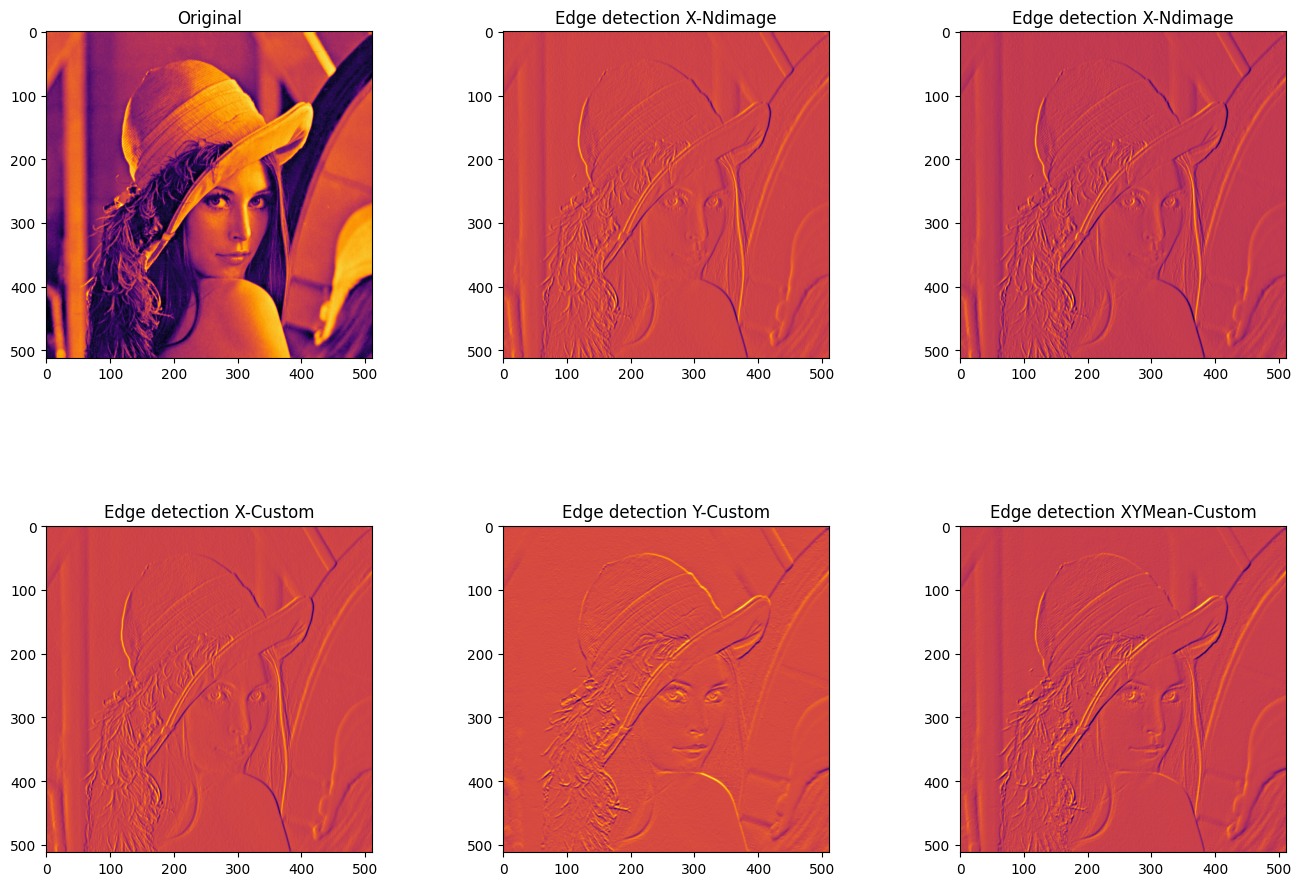

In [26]:
fig = plt.figure(figsize=(16,16))
ax11 = fig.add_subplot(2, 3, 1)
ax12 = fig.add_subplot(2, 3, 2)
ax13 = fig.add_subplot(2, 3, 3)
ax21 = fig.add_subplot(2, 3, 4)
ax22 = fig.add_subplot(2, 3, 5)
ax23 = fig.add_subplot(2, 3, 6)

#p_tem1_x = norm_image(p_tem1_x)

#p_tem1_y = norm_image(p_tem1_y)
#p_tem1 = np.sqrt(np.power(p_tem1_x, 2) + np.power(p_tem1_y, 2))
ax11.set_title("Original")
ax11.imshow(image_pix,    cmap="inferno")

ax12.set_title("Edge detection X-Ndimage")
ax12.imshow(p_tem2,       cmap="inferno")
ax13.set_title("Edge detection X-Ndimage")
ax13.imshow(p_tem2_y,       cmap="inferno")

ax21.set_title("Edge detection X-Custom")
ax21.imshow(p_tem1_x, cmap="inferno")
ax22.set_title("Edge detection Y-Custom")
ax22.imshow(p_tem1_y,       cmap="inferno")
ax23.set_title("Edge detection XYMean-Custom")
ax23.imshow((p_tem1_x+p_tem1_y)/2, cmap="inferno")
plt.subplots_adjust(top = 0.6, bottom=0.01, hspace=0.1, wspace=0.4)
plt.show()

---

In [27]:
def get_matrix_system(data, filter):
    n,m = data.shape
    l, k= filter.shape

    if k != 2*m-1 or l != 2*n-1:
        raise ValueError("Invaild dimension: l, k must be 2n-1, 2m-1")
    
    rows = []
    for i in range(0, n):
        row_i = n-1-i
        row_f = 2*n-1-i

        for j in range(0, m):
            column_i = m-1 -j
            column_f = 2*m-1 -j

            #print(row_i, row_f)
            #print(column_i, column_f)

            t = filter[row_i : row_f, column_i:column_f]

            #print(t.shape)
            rows.append(t.flatten())

    #mat = np.vstack(rows)
    return rows, data.flatten()

In [28]:
K = np.array(
    [[-0, 0, 0, 0, 0],
     [-0, 4, 4, 4, 0],
     [-0, 4,  8, 4, 0],
     [-0, 4, -1, 4, 0],
     [-0, 0, 0, 0, 0]])
l, k = K.shape
n = 3
m = 3
X = np.arange(9).reshape(3,3)

---

In [1]:
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..\..")
from scipy.ndimage import convolve
from scipy.optimize import least_squares, nnls
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

#from uilc import PositionArray
#from uilc.utils import radiation
import math 

import convolution

def lambertian(x, t, s, H):
    k = (x-t)/H
    base = (H**2)*(1 + k**2)**(s/2 +1)
    return np.power(base, -1)
def guassian(x, h):
    return np.exp(-(x/h)**2)/(h*np.sqrt(2*np.pi))

In [208]:
s= 5
H = 0.4
W= 1.2
Wx = 0.2
Wy = 0.12
#---
h = 0.01

In [209]:
n=20
k = 2*n-1
d = lambda i, j, n: (math.floor(n/2)-i)**2 + (math.floor(n/2)-j)**2
dw = W/n

In [210]:
filter =np.fromfunction(lambda i, j: lambertian(0, (dw) *np.sqrt(d(i, j, k)), s, H), (k,k), dtype=float)
distribution = np.where(np.random.rand(*(n, n)) >= 0.93, 1, 0)
#intensity = convolve(distribution, filter, mode='constant', cval=0.0)
intensity = 3000*np.ones(distribution.shape)

In [211]:
A = convolution.get_matrix_system(filter, (n, n))
A.shape

(400, 400)

In [212]:
sol_scipy_nnls = nnls(A, intensity.reshape(-1), 10*A.shape[1])

In [213]:
# scipy
sol_sci = sol_scipy_nnls[0]
sol2d_sci = sol_sci.reshape((n,n))
sol2d_sci = sol2d_sci/sol2d_sci.max()
illumination_sci = convolve(sol2d_sci, filter, mode='constant', cval=0.0)

In [214]:
def sym(a):
    return (a + a.T +np.flip(a) + np.flip(a).T)/4

In [215]:
A_inv = linalg.inv(A)

In [216]:
sol_inv = A_inv.dot(intensity.reshape(-1)).reshape((n,n))

In [217]:
illu_inv = convolve(sol_inv, filter, mode='constant', cval=0.0)

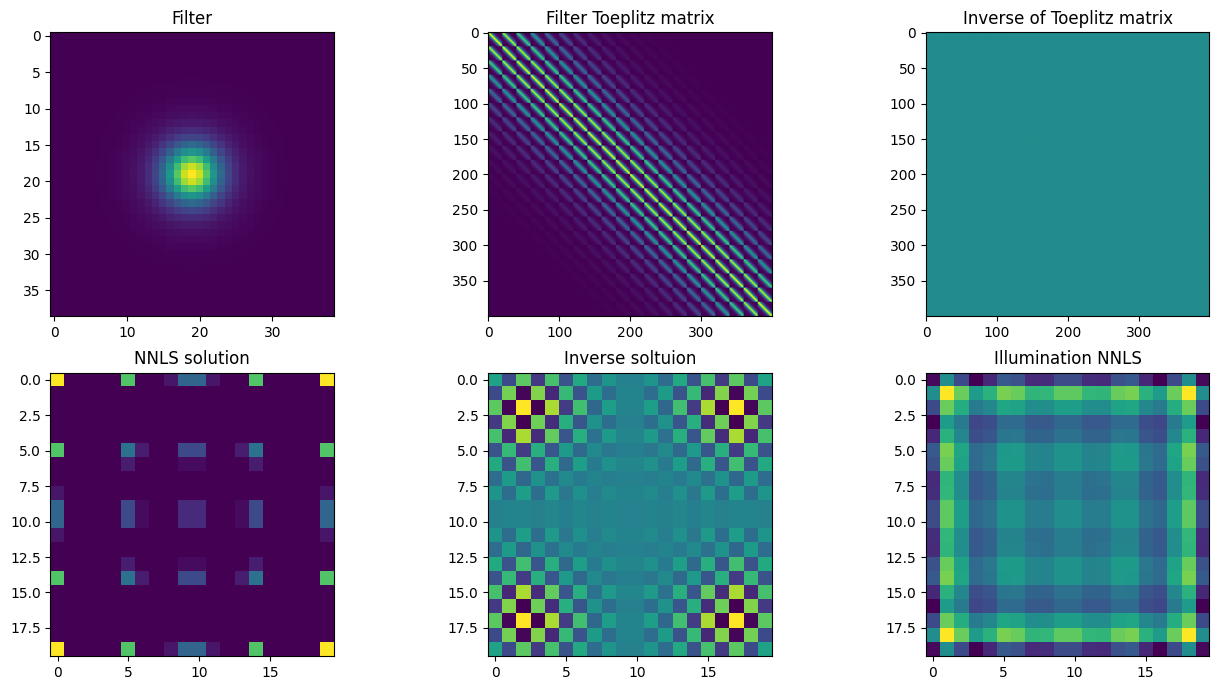

In [218]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 3, 1)# filter
ax2 = fig.add_subplot(2, 3, 2)# distribution
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

ax1.set_title("Filter")
ax1.imshow(filter)
ax2.set_title("Filter Toeplitz matrix")
ax2.imshow(A)
ax3.set_title("Inverse of Toeplitz matrix")
ax3.imshow(A_inv)
ax4.set_title("NNLS solution")
ax4.imshow(sol2d_sci)
ax5.set_title("Inverse soltuion")
ax5.imshow(sol_inv)
ax6.set_title("Illumination NNLS")
ax6.imshow(convolve(sol2d_sci, filter, mode='constant', cval=0.0))
plt.subplots_adjust(top=0.5)
plt.show()

In [219]:
sol_inv.min()

-14007.361081577277

In [220]:
x = y =np.linspace(-W/2, W/2, n, endpoint=True)
X,Y = np.meshgrid(x,y)
Z1 = convolve(sol2d_sci, filter, mode='constant', cval=0)
Z2 = convolve(sol_inv, filter)
Z1 = Z1/Z1.max()
Z2 = Z2/Z2.max()

In [221]:
from copy import deepcopy

In [222]:
sol2d_center =deepcopy(sol2d_sci)
sol2d_center[-1,:] = 0
sol2d_center[0, :]=0 
sol2d_center[:, 0]=0
sol2d_center[:, -1]=0
ill_sci_center = convolve(sol2d_center, filter)

In [223]:
ill_ori = convolve(sol2d_sci, filter, mode='constant', cval=0)

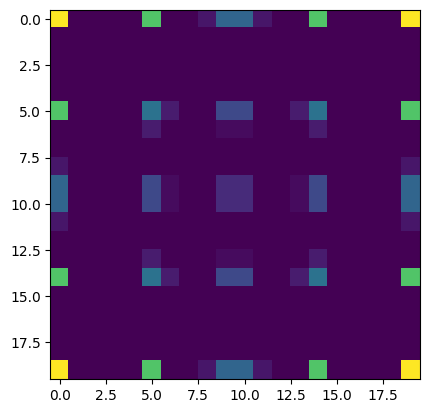

In [224]:
plt.imshow(sol2d_sci)

In [225]:
dw

0.06

In [226]:
dw

0.06

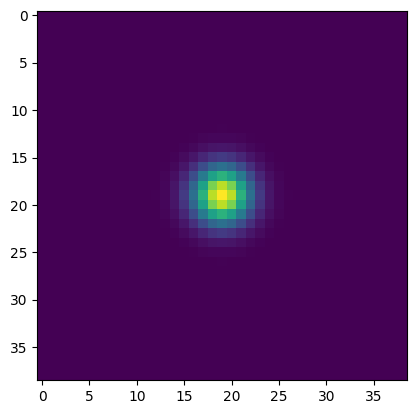

In [227]:
h = 3*dw
gaussian_filter = np.fromfunction(lambda i, j: guassian((dw)*np.sqrt(d(i, j, k)), h), (k,k), dtype=float)
plt.imshow(gaussian_filter)

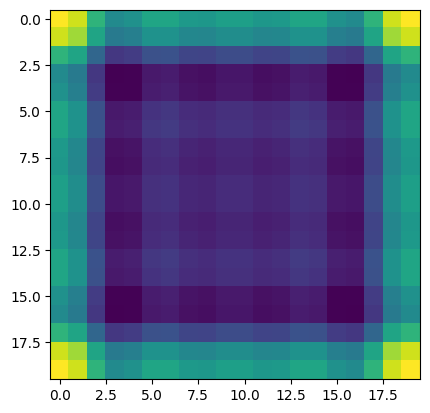

In [228]:
plt.imshow(convolve(sol2d_sci, gaussian_filter, mode="constant", cval=0.))

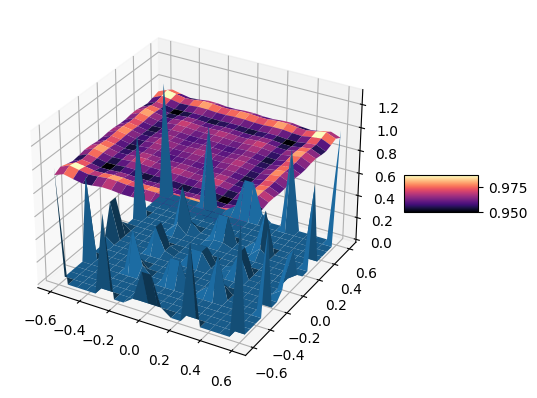

In [229]:
fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, sol2d_sci, zorder=-1)
surf2 = ax.plot_surface(X, Y, Z1, cmap="magma", zorder=-1)
ax.set_zlim(0., 1.3)
fig.colorbar(surf2, shrink=0.1, aspect=0.5)

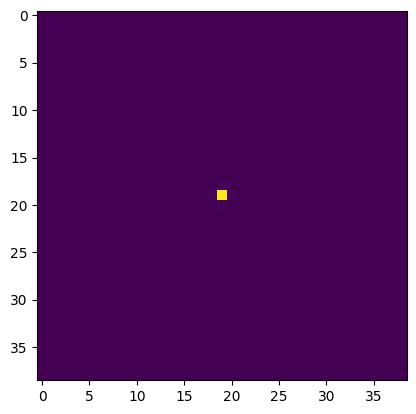

In [351]:
ratio = 10
filter_r = np.fromfunction(lambda i, j: lambertian(0, (dw) *np.sqrt(d(i, j, k)), s, H/ratio), (k,k), dtype=float)
plt.imshow(filter_r)

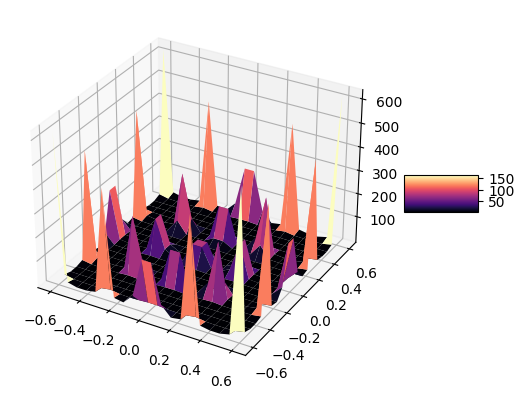

In [352]:
fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
sample_r = convolve(sol2d_sci, filter_r, mode="constant", cval=0.)
surf = ax.plot_surface(X, Y, sample_r, cmap="magma")
#ax.set_zlim(0.8, 1.3)
fig.colorbar(surf, shrink=0.1, aspect=0.5)

### Inverse sampling

In [353]:
def lambertian_vec(sources, t, s, h):
    result = 0
    for si in sources:
        result += lambertian(si, t, s, h)
    return result

In [354]:
from insam_pre import pmf2cdf_2d, int_sampling

In [355]:
cdf = pmf2cdf_2d(sample_r)
cdf = cdf/cdf.max()

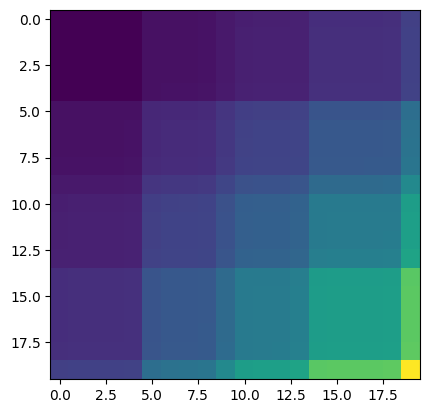

In [356]:
plt.imshow(cdf)

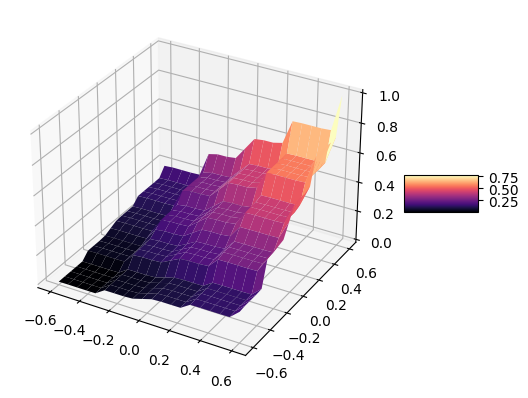

In [357]:
fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
surf = ax.plot_surface(X, Y, cdf, cmap="magma")
#ax.set_zlim(0.8, 1.3)
fig.colorbar(surf, shrink=0.1, aspect=0.5)

In [358]:
cdf.shape

(20, 20)

In [359]:
cdf_1d = np.einsum("ij -> j",cdf)
cdf_1d_ext = np.concatenate([[0], cdf_1d/cdf_1d.max()])

In [360]:
x_line = np.linspace(-W/2, W/2, 800)

In [361]:
N = 11
n = N-1
dn = 1/n
uni_s = [dn * i for i in range(0, n+1)]
#uni_s = np.sort(cheby_root_grid_1(0, 1, N))

# Inverse transform sampling
s_space = np.linspace(-W/2, W/2, cdf_1d.size+1, endpoint=True)
r = int_sampling(np.array(uni_s), cdf= cdf_1d_ext/cdf_1d_ext.max(), domain=s_space , interpolate=True)
r = (r/r.max() *W)-W/2
r_true = (r -np.flip(r))/2 # X

y_line = lambertian_vec(r_true, x_line, s, H)

uniform = np.linspace(-W/2, W/2, r_true.size, endpoint=True)
y_line_uni = lambertian_vec(uniform, x_line, s, H)

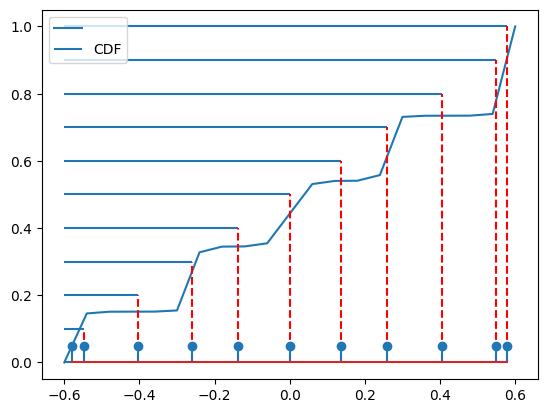

In [362]:
plt.plot(s_space, np.concatenate([[0], cdf_1d/cdf_1d.max()]))
plt.hlines([dn * i for i in range(0, n+1)], xmin=-W/2, xmax=r_true)
plt.vlines(r_true, ymin=0, ymax=uni_s, linestyles="--", colors="r")
plt.stem(r_true, 0.05*np.ones(r.size))
plt.legend(["","CDF"])

0.9763958797315775, 0.9260557189318409
0.03741310202288531, 0.09455427358089251


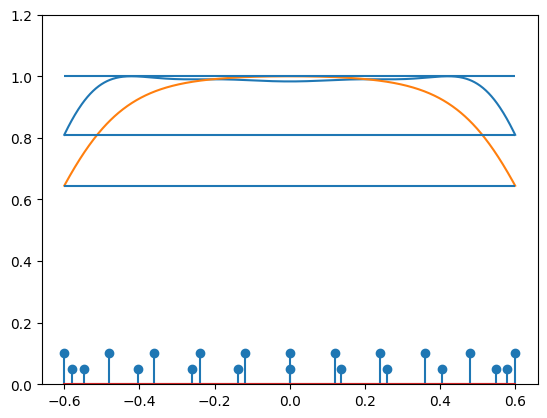

In [363]:
fig, ax = plt.subplots()
normal_bool = True
w1 = y_line_uni.max() if normal_bool else 1
w2 = y_line.max() if normal_bool else 1
y1 = y_line_uni/w1
y = y_line/w2
ax.plot(x_line, y)
ax.plot(x_line, y1)
ax.hlines([y.max(), y.min(), y1.min()], -W/2, W/2)
#ax.text(0, y.min()-0.1, f"Min: {y.min()}")
if normal_bool:
    ax.set_ylim(0, 1.2)
plt.stem(r_true, 0.05*y1.max()*np.ones(r.size))
plt.stem(uniform, 0.1*y1.max()*np.ones(uniform.size))
print(f"{y.mean()}, {y1.mean()}")
print(f"{y.std()}, {y1.std()}")
